In [104]:
import numpy as np
import matplotlib.pyplot as plt
import math
from hmmlearn import hmm


%matplotlib notebook

In [143]:
M = 2
K = 6
L = 50

In [144]:
states = np.array([[0.95, 0.05],
                   [0.1,  0.9]])

In [145]:
emis = np.array([[0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.5]
                            ])

In [146]:
start = np.array([0.5, 0.5])

In [147]:
emis = emis.T

In [148]:
emis

array([[0.16, 0.16, 0.16, 0.16, 0.16, 0.16],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.5 ]])

In [149]:
model = hmm.MultinomialHMM(n_components=2)

In [150]:
model.startprob_ = start

In [151]:
model.transmat_ = states

In [152]:
model.emissionprob_ = emis

In [153]:
X=model.sample(L)

In [154]:
X[0]

array([[4],
       [3],
       [4],
       [1],
       [4],
       [0],
       [3],
       [1],
       [0],
       [1],
       [0],
       [5],
       [2],
       [0],
       [3],
       [1],
       [3],
       [3],
       [5],
       [1],
       [2],
       [0],
       [4],
       [1],
       [5],
       [3],
       [1],
       [0],
       [0],
       [1],
       [0],
       [3],
       [4],
       [0],
       [3],
       [5],
       [4],
       [0],
       [0],
       [5],
       [0],
       [3],
       [0],
       [3],
       [5],
       [4],
       [5],
       [0],
       [3],
       [4]], dtype=int64)

In [155]:
#model.predict(X[0])

In [156]:
MK = np.zeros((L, M))
#MK1 = np.zeros((L, M))

In [157]:
for j in range(M):
    MK[0, j] = emis[j, X[0][0]]*start[j]
    #MK1[0, j] = math.log2(emis[j, X[0][0]])+math.log2(start[j])

для j = 0: $$MK[i, j] = emis[j, X[0][i]]\cdot max(MK[i-1][1]\cdot states[1,0], MK[i-1][0]\cdot states[0, 0])$$
для j = 1: $$MK[i, j] = emis[j, X[0][i]]\cdot max(MK[i-1][0]\cdot states[0,1], MK[i-1][1]\cdot states[1, 1])$$
$X[0]$ - сгенерированный вектор наблюдений

$MK$ - матрица вероятностей для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов

In [158]:
for i in range(1, L):
    for j in range(M):
        if j == 0:
            MK[i, j] = emis[j, X[0][i]]*max(MK[i-1][1]*states[1,0], MK[i-1][0]*states[0, 0])
            #MK1[i, j] = math.log2(emis[j, X[0][i]])+(max(MK1[i-1][1]+math.log2(states[1,0]), 
            #                                                      MK1[i-1][0]+math.log2(states[0, 0])))
        if j == 1:
            MK[i, j] =emis[j, X[0][i]]*max(MK[i-1][0]*states[0,1], MK[i-1][1]*states[1,1])
            #MK1[i, j] = math.log2(emis[j, X[0][i]])+(max(MK1[i-1][0]+math.log2(states[0,1]), 
            #                                                      MK1[i-1][1]+math.log2(states[1, 1])))

In [159]:
MK

array([[8.00000000e-02, 5.00000000e-02],
       [1.21600000e-02, 4.50000000e-03],
       [1.84832000e-03, 4.05000000e-04],
       [2.80944640e-04, 3.64500000e-05],
       [4.27035853e-05, 3.28050000e-06],
       [6.49094496e-06, 2.95245000e-07],
       [9.86623634e-07, 3.24547248e-08],
       [1.49966792e-07, 4.93311817e-09],
       [2.27949524e-08, 7.49833962e-10],
       [3.46483277e-09, 1.13974762e-10],
       [5.26654581e-10, 1.73241639e-11],
       [8.00514964e-11, 1.31663645e-11],
       [1.21678274e-11, 1.18497281e-12],
       [1.84950977e-12, 1.06647553e-13],
       [2.81125485e-13, 9.59827974e-15],
       [4.27310738e-14, 1.40562743e-15],
       [6.49512321e-15, 2.13655369e-16],
       [9.87258728e-16, 3.24756161e-17],
       [1.50063327e-16, 2.46814682e-17],
       [2.28096257e-17, 2.22133214e-18],
       [3.46706310e-18, 1.99919893e-19],
       [5.26993591e-19, 1.79927903e-20],
       [8.01030259e-20, 2.63496796e-21],
       [1.21756599e-20, 4.00515129e-22],
       [1.850700

In [160]:
X[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [161]:
myvit = np.argmax(MK, axis = 1)
myvit

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [162]:
np.argmax(model.predict_proba(X[0]), axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [163]:
model.decode(X[0])[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

для j = 0: $$PU[i, j] = PU[i-1][j]\cdot states[j,j]\cdot emis[j, X[0][i-1]]+PU[i-1][1]\cdot states[1,j]\cdot emis[j, X[0][i-1]]$$
для j = 1: $$PU[i, j] = PU[i-1][j]\cdot states[j,j]\cdot emis[j, X[0][i-1]]+PU[i-1][0]\cdot states[0,j]\cdot emis[j, X[0][i-1]]$$
$X[0]$ - сгенерированный вектор наблюдений

$PU$ - матрица вероятностей алгоритма прямого хода для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов

In [164]:
PU = np.zeros((L+1, M))
#PU1 = np.zeros((L+1, M))
PU[0] = start
#PU1[0][0] = math.log2(start[0])
#PU1[0][1] = math.log2(start[1])

In [165]:
for j in range(M):
    PU[1, j] = emis[j, X[1][0]]*start[j]
    #PU1[1, j] = math.log2(emis[j, X[1][0]]) + math.log2(start[j])

In [166]:
for i in range(2, L+1):
    for j in range(M):
            if j == 0:
                PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][1]*states[1,j]*emis[j, X[0][i-1]]
                #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                #+ PU1[i-1][1] + math.log2(states[1,j]) + math.log2(emis[j, X[0][i-1]])
            if j == 1:
                PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][0]*states[0,j]*emis[j, X[0][i-1]]
                #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                #+ PU1[i-1][1] + math.log2(states[0,j]) + math.log2(emis[j, X[0][i-1]])

In [167]:
PU_b = np.zeros((L+1, M))
#PU_b1 = np.zeros((L+1, M))

In [168]:
for j in range(M):
    PU_b[L, j] = 1
   # PU_b1[L, j] = math.log2(1)

In [169]:
for i in range(L-1,-1,-1):
    for j in range(M):
            if j == 0:
                PU_b[i, j] = PU_b[i+1][j]*states[j,j]*emis[j, X[0][i]] + PU_b[i+1][1]*states[j, 1]*emis[j, X[0][i]]
               # PU_b1[i, j] = PU_b1[i+1][j] + math.log2(states[j,j]) + math.log2(emis[j, X[0][i]])
               # + PU_b1[i+1][1] + math.log2(states[j, 1]) + math.log2(emis[j, X[0][i]])
            if j == 1:
                PU_b[i, j] = PU_b[i+1][j]*states[j,j]*emis[j, X[0][i]] + PU_b[i+1][0]*states[j, 0]*emis[j, X[0][i]]
               # PU_b1[i, j] = PU_b1[i+1][j] + math.log2(states[j,j]) + math.log2(emis[j, X[0][i]])
               # +PU_b1[i+1][1] + math.log2(states[j, 0]) + math.log2(emis[j, X[0][i]])

In [170]:
P = (sum(PU_b[0]*start) + sum(PU[-1]))/2

In [171]:
sum(PU_b[0]*start)

2.7197293182248156e-41

In [172]:
sum(PU[-1])

2.7197293182248176e-41

In [173]:
Pd = np.zeros((L, M))

In [174]:
for i in range(L):
    for j in range(M):
        Pd[i, j] = (PU[i,j]*PU_b[i,j])/sum(PU[-1])

In [175]:
Pd

array([[0.86232244, 0.13767756],
       [0.9000894 , 0.09046886],
       [0.95115494, 0.0585529 ],
       [0.98042928, 0.04025643],
       [0.99687554, 0.02997752],
       [1.00552917, 0.024569  ],
       [1.00903971, 0.02237492],
       [1.008482  , 0.02272348],
       [1.00368529, 0.02572143],
       [0.99318094, 0.03228665],
       [0.97375275, 0.04442926],
       [0.93945229, 0.06586706],
       [0.93838956, 0.06918809],
       [0.96768238, 0.05088008],
       [0.98193842, 0.04197005],
       [0.98552256, 0.03972996],
       [0.97953217, 0.04347395],
       [0.96213315, 0.05434835],
       [0.9279983 , 0.07568262],
       [0.92719891, 0.07818072],
       [0.95756698, 0.05920068],
       [0.9710755 , 0.05075785],
       [0.97186047, 0.05026724],
       [0.96016222, 0.05757865],
       [0.93239904, 0.07493064],
       [0.93422073, 0.06923785],
       [0.97056784, 0.04652091],
       [0.99113197, 0.03366833],
       [1.00220937, 0.02674495],
       [1.00719168, 0.02363101],
       [1.

In [176]:
model.predict_proba(X[0])

array([[0.86232244, 0.13767756],
       [0.91134052, 0.08865948],
       [0.93955907, 0.06044093],
       [0.95561796, 0.04438204],
       [0.96443403, 0.03556597],
       [0.96870657, 0.03129343],
       [0.96974372, 0.03025628],
       [0.96786304, 0.03213696],
       [0.9624887 , 0.0375113 ],
       [0.9519752 , 0.0480248 ],
       [0.93310357, 0.06689643],
       [0.90009575, 0.09990425],
       [0.92910505, 0.07089495],
       [0.94440114, 0.05559886],
       [0.95066732, 0.04933268],
       [0.94982215, 0.05017785],
       [0.94160686, 0.05839314],
       [0.92350612, 0.07649388],
       [0.88997791, 0.11002209],
       [0.92049841, 0.07950159],
       [0.93590961, 0.06409039],
       [0.94093005, 0.05906995],
       [0.93709688, 0.06290312],
       [0.92323646, 0.07676354],
       [0.89510506, 0.10489494],
       [0.93009057, 0.06990943],
       [0.95008006, 0.04991994],
       [0.96119382, 0.03880618],
       [0.96683463, 0.03316537],
       [0.96872957, 0.03127043],
       [0.

In [177]:
fal = 0
fal1 = 0
fal2 = 0
fal3 = 0
for i in range(L):
    if X[1][i]!=model.predict(X[0])[i]:
        fal +=1
    if X[1][i]!=np.argmax(model.predict_proba(X[0]), axis = 1)[i]:
        fal1 +=1
    if X[1][i]!=myvit[i]:
        fal2 +=1
    if X[1][i]!=np.argmax(Pd, axis=1)[i]:
        fal3 +=1

In [178]:
print(fal/L, fal1/L, fal2/L, fal3/L)

0.12 0.12 0.12 0.12


In [179]:
np.argmax(Pd, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>


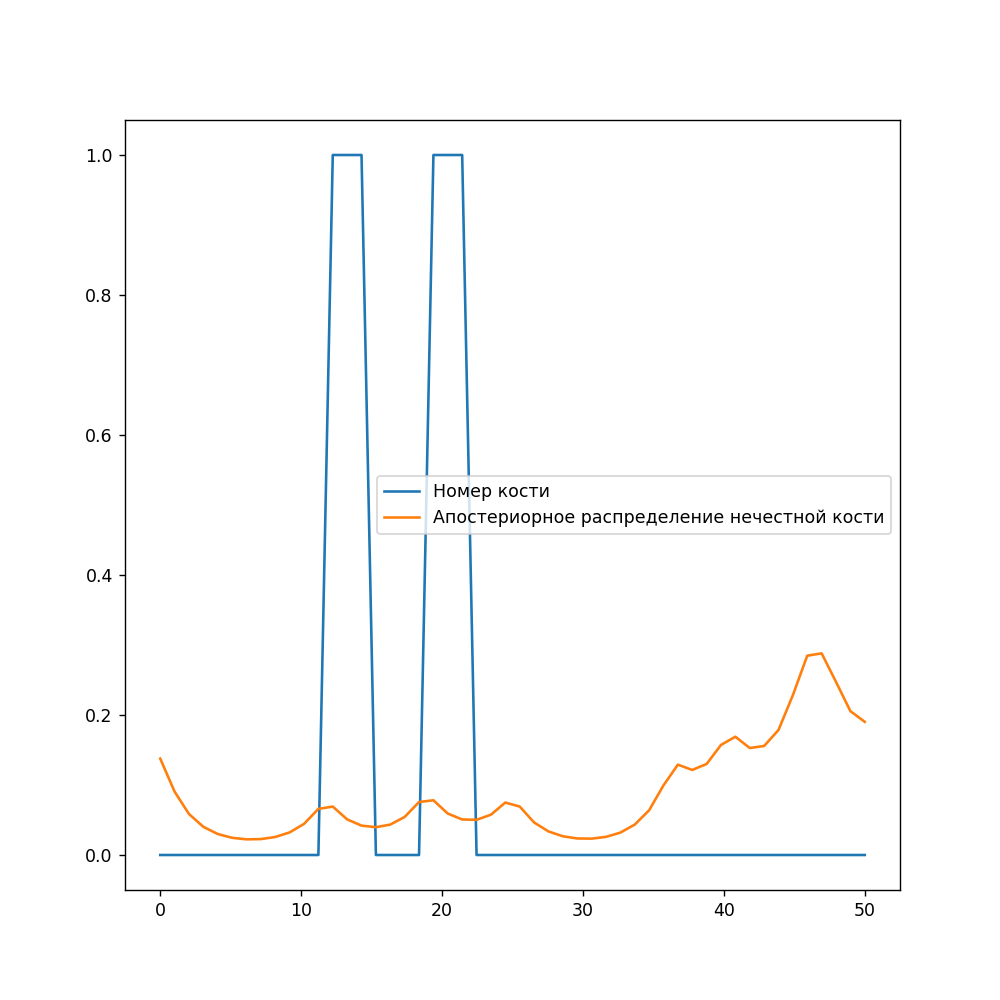

In [180]:
s = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(8, 8))
#ax.plot(s, model.predict(X[0]))
#ax.plot(s, myvit)
#ax.plot(s, model.predict_proba(X[0]))
#ax.plot(s, model.decode(X[0])[1])
ax.plot(s, X[1], label = 'Номер кости')
#ax.scatter(s, X[0]/5, label = 'Кол-во очков', color='r')
ax.plot(s, Pd[::, 1], label = 'Апостериорное распределение нечестной кости')
ax.legend()